# Using MySQL and Seaborn, visualise some of the main health metrics

In [98]:
import mysql.connector
import pandas as pd 
import matplotlib.pyplot as plt 

def connect_to_db():
    # open connectoin to db
    mydb = mysql.connector.connect(host="localhost")
    mydb = mysql.connector.connect(
        host="localhost",
        user="fergus",
        database="health_records",
        password=""
    )
    cursor = mydb.cursor()
    return mydb, cursor

def query(q):
    mydb, cursor = connect_to_db()
    cursor.execute(q)
    result = cursor.fetchall()
    cursor.close()
    mydb.close()
    return result

# First lets see the health records avaiable 

In [3]:
query("select distinct identifier from health_records")

[('HKQuantityTypeIdentifierHeight',),
 ('HKQuantityTypeIdentifierBodyMass',),
 ('HKQuantityTypeIdentifierHeartRate',),
 ('HKQuantityTypeIdentifierOxygenSaturation',),
 ('HKQuantityTypeIdentifierRespiratoryRate',),
 ('HKQuantityTypeIdentifierStepCount',),
 ('HKQuantityTypeIdentifierDistanceWalkingRunning',),
 ('HKQuantityTypeIdentifierBasalEnergyBurned',),
 ('HKQuantityTypeIdentifierActiveEnergyBurned',),
 ('HKQuantityTypeIdentifierFlightsClimbed',),
 ('HKQuantityTypeIdentifierAppleExerciseTime',),
 ('HKQuantityTypeIdentifierDietaryCaffeine',),
 ('HKQuantityTypeIdentifierDistanceCycling',),
 ('HKQuantityTypeIdentifierRestingHeartRate',),
 ('HKQuantityTypeIdentifierVO2Max',),
 ('HKQuantityTypeIdentifierWalkingHeartRateAverage',),
 ('HKQuantityTypeIdentifierEnvironmentalAudioExposure',),
 ('HKQuantityTypeIdentifierHeadphoneAudioExposure',),
 ('HKQuantityTypeIdentifierWalkingDoubleSupportPercentage',),
 ('HKQuantityTypeIdentifierSixMinuteWalkTestDistance',),
 ('HKQuantityTypeIdentifierAppl

Okay lets have a look at Step count 

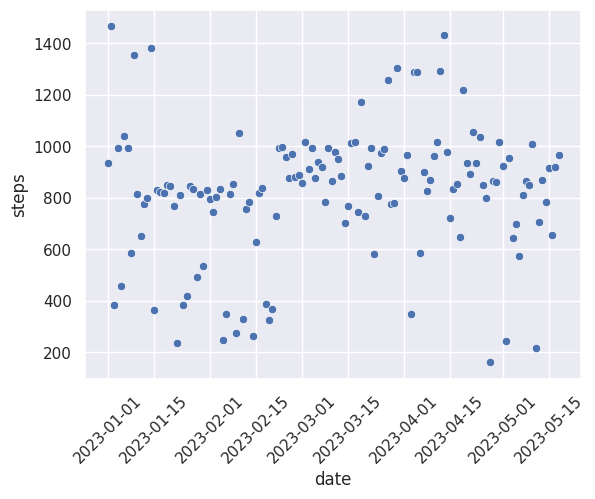

In [100]:
r = query("select creationDate, numerical_value from health_records where identifier = 'HKQuantityTypeIdentifierStepCount' AND creationDate > '2023-01-01 00:00:00'")
df = pd.DataFrame(data=r, columns=['date', 'steps'])
df['date'] = pd.to_datetime(df['date']).dt.date
df = df.groupby('date').max()
g = sns.scatterplot(data=df, x='date', y='steps')
plt.xticks(rotation=45)
plt.show()

<br> 

## Heart Rate

In [91]:
r = query("select creationDate, numerical_value from health_records where identifier = 'HKQuantityTypeIdentifierHeartRate' AND creationDate > '2023-01-01 00:00:00'")
df = pd.DataFrame(data=r, columns=['date', 'heart_rate'])
df['date'] = pd.to_datetime(df['date']).dt.date
df 

,date,heart_rate
0,2023-01-01,71.0
1,2023-01-01,69.0
2,2023-01-01,69.0
3,2023-01-01,67.0
4,2023-01-01,62.0
...,...,...
71320,2023-05-18,83.0
71321,2023-05-18,119.0
71322,2023-05-18,117.0
71323,2023-05-18,116.0


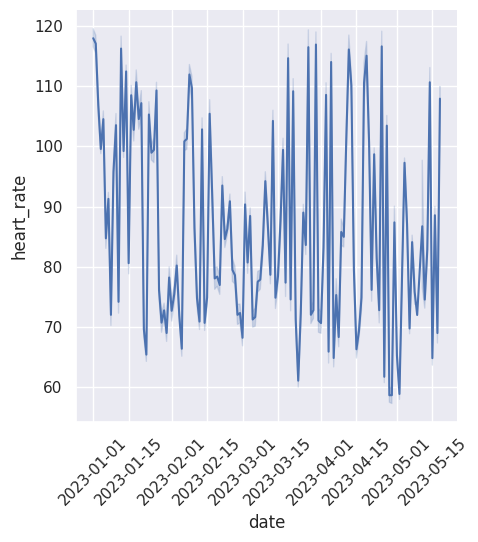

In [92]:
g = sns.relplot(data=df, x='date', y='heart_rate', kind='line')
plt.xticks(rotation=45)
plt.show()

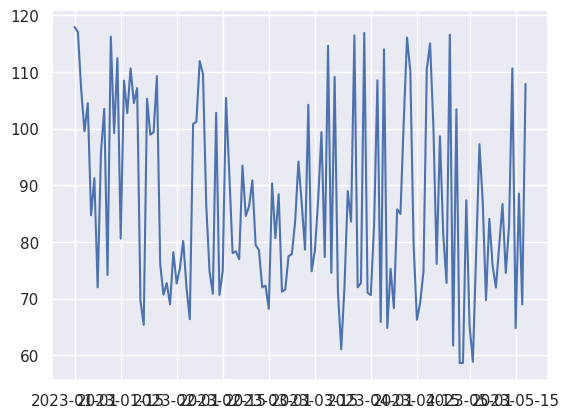

In [93]:
df = df.groupby('date').mean()
plt.plot(df.index, df.heart_rate)